# Dia 1 - Introdução à Julia

Para começar, vamos conhecer a IDE.

 - Abra o julia: No terminal, use o comando
````bash
julia
````
 - Abra o Atom
 - E este é o Jupyter notebook, que você abre no terminal com o comando
````bash
jupyter notebook
````

No Jupyter notebook alternamos entre texto e comandos (neste caso do Julia).
Os mesmos comandos funcionam no julia aberto pelo terminal.

In [2]:
2+2

4

In [3]:
3^5

243

In [4]:
v = rand(5)

5-element Array{Float64,1}:
 0.415346
 0.456934
 0.410073
 0.96471 
 0.622741

In [16]:
e = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [6]:
z = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [7]:
A = rand(3,5)

3x5 Array{Float64,2}:
 0.605059  0.553652   0.595556  0.047726  0.0378159
 0.105525  0.0697729  0.261311  0.822387  0.636855 
 0.579466  0.920851   0.300676  0.784652  0.985102 

In [8]:
G = chol(A*A')

3x3 UpperTriangular{Float64,Array{Float64,2}}:
 1.01539  0.316564  1.09732 
 0.0      1.03246   1.09375 
 0.0      0.0       0.678133

In [17]:
b = A*(A'*e)

3-element Array{Float64,1}:
 2.46667
 2.96425
 5.45109

$$ AA^Tx = b \qquad \mbox{e} \qquad
G^TG = AA^T \qquad
\Longrightarrow \qquad x = G^{-1}G^{-T}b $$

In [18]:
x = G\(G'\b)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [19]:
x-e

3-element Array{Float64,1}:
 -4.44089e-16
 -1.11022e-15
  8.88178e-16

In [20]:
n = 5

5

In [34]:
A = zeros(n,n)
for i = 1:n
    for j = 1:n
        A[i,j] = i + j - 1
    end
end
println("A = \n$A")

A = 
[1.0 2.0 3.0 4.0 5.0
 2.0 3.0 4.0 5.0 6.0
 3.0 4.0 5.0 6.0 7.0
 4.0 5.0 6.0 7.0 8.0
 5.0 6.0 7.0 8.0 9.0]


In [40]:
# Uma função que soma todos os elementos de A
function soma_tudo(A)
    soma = 0.0
    (m,n) = size(A)
    for i = 1:m
        for j = 1:n
            soma += A[i,j]
        end
    end
    return soma
end

soma_tudo (generic function with 1 method)

In [41]:
soma_tudo(A)

125.0

In [42]:
f(x) = x^2 - 5x + 6

f (generic function with 1 method)

In [43]:
f(2)

0

In [44]:
f(3)

0

In [45]:
f(4)

2

In [46]:
f(1)

2

In [47]:
function integral(f, a, b)
    N = 50
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral (generic function with 1 method)

In [50]:
integral(f, 0, 1) - (1/3 - 5/2 + 6)

6.666666666710341e-5

In [51]:
integral(x->exp(x), 0, 1) - (exp(1) - 1)

5.7275679112400724e-5

## Argumentos opcionais

In [60]:
function integral2(f, a, b, N = 50)
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral2 (generic function with 2 methods)

In [66]:
integral2(x->exp(x), 0, 1, 1000) - (exp(1) - 1)

1.43190151069561e-7

## Argumentos por palavra-chave

In [68]:
function integral3(f, a, b; N = 50)
    I = (f(a) + f(b))/2
    h = (b-a)/N
    for i = 1:N-1
        I += f(a + i*h)
    end
    return I*h
end

integral3 (generic function with 1 method)

In [69]:
integral3(x->exp(x), 0, 1, N = 1000) - (exp(1) - 1)

1.43190151069561e-7

## Besteira estética

O Julia aceita vários caracteres especiais, e alguns tem significa especial.
Para acessar uma grande parte deles podemos usar a definição do LaTeX e apertar o 
TAB para completar o símbolo.

Muitas vezes usar o símbolo na variável facilita o entendimento.

Note ainda que para usar esse símbolo no editor, o editor precisa estar configurado para isso.

In [71]:
π #\pi

π = 3.1415926535897...

In [72]:
α = 1e-2 #\alpha

0.01

In [73]:
A = rand(5,5)
∇f(x) = 0.5*dot(x, A*x) #\nabla

∇f (generic function with 1 method)

In [74]:
∇f(ones(5))

6.431849888726262

In [75]:
ξ(v,l,u) = max(l, min(u, v)) #\xi

ξ (generic function with 1 method)

In [77]:
l = rand(5); u = rand(5) + l; x = rand(5)./rand(5)

5-element Array{Float64,1}:
 169.141   
   1.58721 
   0.532098
   1.68268 
   0.13078 

In [79]:
l .<= v .<= u

5-element BitArray{1}:
 false
  true
 false
 false
 false

In [80]:
w = ξ(x,l,u)

5-element Array{Float64,1}:
 0.946834
 0.864375
 0.754468
 0.532054
 0.262623

In [81]:
l .<= w .<= u

5-element BitArray{1}:
 true
 true
 true
 true
 true

In [82]:
x₀ = zeros(5) # x\_0

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [84]:
3 ∈ [2, 4, 5] # \in

false

In [86]:
[2, 3]∪[1, 5] #\cup

4-element Array{Int64,1}:
 2
 3
 1
 5

## Tipos

Julia não precisa de declaração de tipos, inclusive às vezes não passar o tipo de um objeto facilita a otimização do compilador.
No entanto, todo objeto tem um tipo, e existe uma hierarquia de tipos.
Alguns tipos são abstratos, servindo de conexão entre os tipos, e alguns são concretos, como Int, Float64 e ASCIIString.

In [145]:
typeof(0)

Int64

In [146]:
typeof(0.0)

Float64

In [147]:
typeof("")

ASCIIString

In [148]:
typeof(rand(3))

Array{Float64,1}

In [157]:
typeof((2,3.0))

Tuple{Int64,Float64}

In [212]:
[2, 3.0]

2-element Array{Float64,1}:
 2.0
 3.0

In [213]:
[2, 3.0, "a"]

3-element Array{Any,1}:
 2   
 3.0 
  "a"

Alguns tipos tem apelidos para facilitar o uso.

In [150]:
Int

Int64

In [152]:
Vector

Array{T,1}

In [153]:
Vector{Int}

Array{Int64,1}

In [154]:
Matrix

Array{T,2}

In [169]:
typeof(rand(3,3))

Array{Float64,2}

In [170]:
typeof(3//4)

Rational{Int64}

## Funções para tipos específicos

In [160]:
function estranha(x::Int)
    return x + 1
end

function estranha(x::Float64)
    return x - 1
end

estranha (generic function with 2 methods)

In [161]:
estranha(0)

1

In [162]:
estranha(0.0)

-1.0

In [164]:
estranha("")

LoadError: LoadError: MethodError: `estranha` has no method matching estranha(::ASCIIString)
while loading In[164], in expression starting on line 1

Note que algumas funções são "chatas":

In [167]:
sqrt(-1)

LoadError: LoadError: DomainError:
sqrt will only return a complex result if called with a complex argument. Try sqrt(complex(x)).
while loading In[167], in expression starting on line 1

In [168]:
sqrt(Complex(-1))

0.0 + 1.0im

Temos ainda os tipos especiais, úteis, mas que podem deixar seu código lento:

In [201]:
(2^32)^4

0

In [176]:
BigInt(2^32)^4

340282366920938463463374607431768211456

In [194]:
1e-100^10

0.0

In [195]:
BigFloat(1e-100)^10

1.000000000000000199918998026028854181900205164437319696086145393068052250525208e-1000

## Plots

In [202]:
Pkg.add("Winston")
using Winston

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages

Use "AbstractVecOrMat{T}(" instead.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Cairo.ji for module Cairo.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Reexport.ji for module Reexport.
INFO: Recompiling stale cache file /home/abel/.julia/lib/v0.4/Graphics.ji for module Graphics.
  likely near /home/abel/.julia/v0.4/IniFile/src/IniFile.jl:24
  likely near /home/abel/.julia/v0.4/IniFile/src/IniFile.jl:24
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot

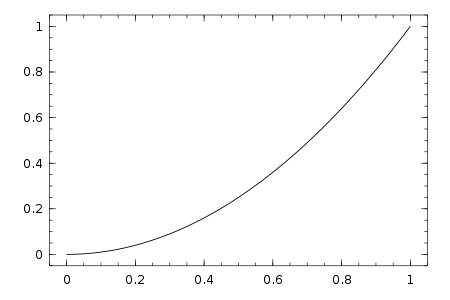

In [203]:
t = linspace(0, 1, 100);
plot(t, t.^2)

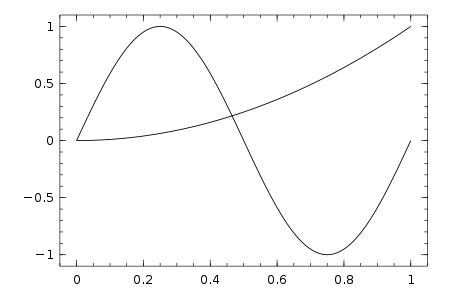

In [204]:
oplot(t, sin(2π*t))

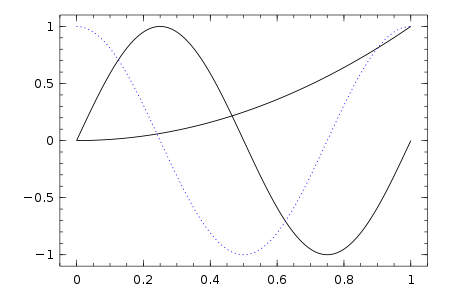

In [206]:
oplot(t, cos(2π*t), "b:")

In [210]:
p = FramedPlot()
colors = ["blue", "red", "green"]
for i = 1:3
    add(p, Curve(t, t.^i, color=colors[i]))
    add(p, Points(rand(10), rand(10), color=colors[i]))
end
savefig(p, "teste.png", "width", 500, "height", 500)

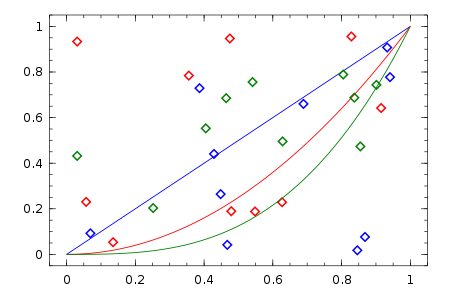

In [211]:
display(p)

## Coisas incomuns para MatLab

Alguns coisas comuns em outras linguagens, tipo o Python.

In [214]:
# Para cada elemento de um conjunto
for x in ["blue", "red", "green"]
    println("color $x")
end

color blue
color red
color green


In [216]:
# Tuplas
(a, b) = (2,3)
println("a = $a, b = $b")

a = 2, b = 3


In [218]:
# For com tupla
for (i,x) in enumerate(["blue", "red", "green"])
    println("color Nᵒ$i: $x")
end

color Nᵒ1: blue
color Nᵒ2: red
color Nᵒ3: green


In [222]:
# Operador ternário
F(n::Int) = n < 2 ? 1 : F(n-1)*n
for n = 1:6
    println("$(n)! = $(F(n))")
end

1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720


In [234]:
# Short-circuit
function bhaskara(a, b, c)
    a == 0 && error("Primeiro argumento não pode ser 0")
    Δ = b^2 - 4a*c
    Δ = Δ >= 0 ? sqrt(Δ) : sqrt(Complex(Δ))
    return (-b+Δ)/2a, (-b-Δ)/2a
end

bhaskara (generic function with 1 method)

In [235]:
bhaskara(0, 0, 1)

LoadError: LoadError: Primeiro argumento não pode ser 0
while loading In[235], in expression starting on line 1

In [236]:
# Compreensão de vetor
[i^2 for i = 1:5]

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

In [237]:
[log(x) for x = 1:4]

4-element Array{Float64,1}:
 0.0     
 0.693147
 1.09861 
 1.38629 

In [238]:
[1//(i+j-1) for i = 1:4, j = 1:4]

4x4 Array{Rational{Int64},2}:
 1//1  1//2  1//3  1//4
 1//2  1//3  1//4  1//5
 1//3  1//4  1//5  1//6
 1//4  1//5  1//6  1//7